In [71]:
import tensorflow
import keras 
import numpy as np
import pandas as pd
import keras.datasets.mnist as mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib


In [72]:
#1. 데이터 import하기. (keras.dataset)
train_data, test_data = mnist.load_data()
x_test, y_test = test_data
## 학습 데이터는 28*28 행렬로 이루어져있다.
## train_data [0] 은 x데이터로 (60000, 28, 28)임. 이것을 60000, 784로 reshape해야함.
## train_data [1] 은 y데이터로 (60000, 1) 임. 이것은 one-hot-encoding할 필요가 있음.
x_train = train_data[0][:50000]
y_train = train_data[1][:50000]
x_val = train_data[0][50000:]
y_val = train_data[1][50000:]


#2. 데이터 가공하기. 
#   먼저 reshape한 후, 일부를 추출하도록 한다.

# ** reshape는 numpy array의 내장함수이다. **
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# train셋에서 700개, val셋에서 300개를 랜덤 추출하도록 한다.
train_rand_idx = np.random.choice(50000, 700)
val_rand_idx = np.random.choice(10000, 300)
x_train = x_train[train_rand_idx]
y_train = y_train[train_rand_idx]
x_val = x_val[val_rand_idx]
y_val = y_val[val_rand_idx]

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)



#3. 모델 만들기(가설함수)
model = Sequential()
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #분류 클래스가 10개니까 최종 레이어 아웃풋은 10개여야함

#4. 컴파일하기 loss함수와 optimizer(예: gradient descent) 만들기

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#5. EarlyStopping조건 설정
early_stopping = EarlyStopping(patience=20)



#6. 학습 실행하기
## 1) 학습에서 필요한 조건은 epoch, batch_size(몇번 돌 것이냐)
hist = model.fit(x_train, y_train, epochs=3000,batch_size=10, callbacks=[early_stopping], validation_data=[x_val,y_val])


#7. 그래프로 살펴보기


#8. 정확도

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 1s 2ms/step - loss: 2.2666 - acc: 0.1557 - val_loss: 2.2242 - val_acc: 0.1533
Epoch 2/3000
700/700 [==============================] - 0s 328us/step - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1619 - val_acc: 0.1500
Epoch 3/3000
700/700 [==============================] - 0s 384us/step - loss: 2.1118 - acc: 0.2114 - val_loss: 2.1134 - val_acc: 0.2300
Epoch 4/3000
700/700 [==============================] - 0s 365us/step - loss: 2.0641 - acc: 0.2243 - val_loss: 2.0629 - val_acc: 0.2667
Epoch 5/3000
700/700 [==============================] - 0s 404us/step - loss: 2.0219 - acc: 0.2657 - val_loss: 2.0215 - val_acc: 0.2800
Epoch 6/3000
700/700 [==============================] - 0s 478us/step - loss: 1.9811 - acc: 0.2929 - val_loss: 1.9830 - val_acc: 0.2967
Epoch 7/3000
700/700 [==============================] - 0s 316us/step - loss: 1.9445 - acc: 0.3057 - val_loss: 1.9447 - val_acc: 0.3300
Epoc

700/700 [==============================] - 0s 265us/step - loss: 1.2556 - acc: 0.5686 - val_loss: 1.3973 - val_acc: 0.5300
Epoch 61/3000
700/700 [==============================] - 0s 264us/step - loss: 1.2498 - acc: 0.5700 - val_loss: 1.3983 - val_acc: 0.5233
Epoch 62/3000
700/700 [==============================] - 0s 273us/step - loss: 1.2464 - acc: 0.5529 - val_loss: 1.3931 - val_acc: 0.5167
Epoch 63/3000
700/700 [==============================] - 0s 266us/step - loss: 1.2402 - acc: 0.5629 - val_loss: 1.3953 - val_acc: 0.5267
Epoch 64/3000
700/700 [==============================] - 0s 265us/step - loss: 1.2360 - acc: 0.5643 - val_loss: 1.3959 - val_acc: 0.5300
Epoch 65/3000
700/700 [==============================] - 0s 260us/step - loss: 1.2315 - acc: 0.5600 - val_loss: 1.3917 - val_acc: 0.5233
Epoch 66/3000
700/700 [==============================] - 0s 265us/step - loss: 1.2259 - acc: 0.5657 - val_loss: 1.3902 - val_acc: 0.5333
Epoch 67/3000
700/700 [==============================] 

In [67]:
hist.history

{'acc': [0.15428571732980864,
  0.20285714768937657,
  0.2057142908019679,
  0.21000000440648625,
  0.24142857598406928,
  0.28714286259242466,
  0.28857143382940975,
  0.3042857190327985,
  0.3014285765588284,
  0.3100000054708549,
  0.31571429212178503,
  0.33857143595814704,
  0.3342857204377651,
  0.3357142918876239,
  0.35000000723770686,
  0.3657142935054643,
  0.3785714355962617,
  0.39000000921743255,
  0.3928571480725493,
  0.388571435213089,
  0.39857143685221674,
  0.4042857211615358,
  0.4114285772400243,
  0.4057142908019679,
  0.4085714351918016,
  0.4071428635290691,
  0.42714286425283976,
  0.4157142907381058,
  0.4300000061946256,
  0.42428572135312215,
  0.4242857218853065,
  0.4300000076847417,
  0.42857143878936765,
  0.42857143527695113,
  0.43428572043776514,
  0.44285714903048107,
  0.4371428630181721,
  0.4414285772613117,
  0.45142857751676013,
  0.45857143529823846,
  0.4485714355749743,
  0.45857143444674353,
  0.45857143604329653,
  0.47000000732285635,
  0.

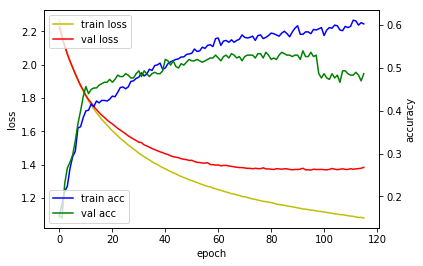

10000/10000 [==============================] - 4s 375us/step

loss : 1.4184071056574583
accuracy : 0.4886


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch') #x축 이름 정하기
loss_ax.set_ylabel('loss') #y축 이름 정하기
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=2)

print('')
print('loss : '+ str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))
